# Facebook Prophet model for Time Series Forecasting

In [1]:
!pip install pystan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 KB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 67.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 91.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 KB 5.9 MB/s eta 0:00:00


In [2]:
!python -m pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import prophet

In [4]:
dir(prophet)

['Path',
 'Prophet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'about',
 'diagnostics',
 'f',
 'forecaster',
 'hdays',
 'here',
 'make_holidays',
 'models',
 'plot']

In [5]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

In [6]:
df = pd.read_csv('/content/covid_19_clean_complete.csv')
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [7]:
df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe
49067,NaN,Lesotho,-29.610000,28.233600,2020-07-27,505,12,128,365,Africa


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [11]:
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [12]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [13]:
df['Date'].nunique()

188

In [14]:
df.head(2)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe


In [16]:
total = df.groupby(['Date'])['Confirmed','Deaths','Recovered','Active'].sum().reset_index()

In [17]:
total

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010
...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006
184,2020-07-24,15791645,639650,8939705,6212290
185,2020-07-25,16047190,644517,9158743,6243930
186,2020-07-26,16251796,648621,9293464,6309711


# Facebook Prophet Model

In [19]:
df_prophet = total.rename(columns={'Date':'ds', 'Confirmed':'y'})

In [20]:
df_prophet

,ds,y,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010
...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006
184,2020-07-24,15791645,639650,8939705,6212290
185,2020-07-25,16047190,644517,9158743,6243930
186,2020-07-26,16251796,648621,9293464,6309711


In [21]:
from prophet import Prophet

In [22]:
m = Prophet()

In [23]:
model = m.fit(df_prophet)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzzoeljkd/wx5y3cat.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzzoeljkd/qnboc6m7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16777', 'data', 'file=/tmp/tmpzzoeljkd/wx5y3cat.json', 'init=/tmp/tmpzzoeljkd/qnboc6m7.json', 'output', 'file=/tmp/tmpzzoeljkd/prophet_modelsm5ko3pd/prophet_model-20230328031840.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:18:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:18:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [24]:
model.seasonalities

OrderedDict([('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [25]:
len(df_prophet)

188

In [26]:
df_prophet.tail()

,ds,y,Deaths,Recovered,Active
183,2020-07-23,15510481,633506,8710969,6166006
184,2020-07-24,15791645,639650,8939705,6212290
185,2020-07-25,16047190,644517,9158743,6243930
186,2020-07-26,16251796,648621,9293464,6309711
187,2020-07-27,16480485,654036,9468087,6358362


In [27]:
future_global = model.make_future_dataframe(periods=100, freq='D')

In [28]:
future_global

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
283,2020-10-31
284,2020-11-01
285,2020-11-02
286,2020-11-03


# Prediction

In [29]:
prediction = model.predict(future_global)

In [30]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-1.062204e+04,-1.242027e+05,8.220611e+04,-1.062204e+04,-1.062204e+04,-11022.919838,-11022.919838,-11022.919838,-11022.919838,-11022.919838,-11022.919838,0.0,0.0,0.0,-2.164495e+04
1,2020-01-23,-7.870816e+03,-1.178793e+05,9.825447e+04,-7.870816e+03,-7.870816e+03,-1082.195992,-1082.195992,-1082.195992,-1082.195992,-1082.195992,-1082.195992,0.0,0.0,0.0,-8.953012e+03
2,2020-01-24,-5.119598e+03,-9.948289e+04,1.072654e+05,-5.119598e+03,-5.119598e+03,10096.194723,10096.194723,10096.194723,10096.194723,10096.194723,10096.194723,0.0,0.0,0.0,4.976597e+03
3,2020-01-25,-2.368379e+03,-8.938260e+04,1.176091e+05,-2.368379e+03,-2.368379e+03,13721.169479,13721.169479,13721.169479,13721.169479,13721.169479,13721.169479,0.0,0.0,0.0,1.135279e+04
4,2020-01-26,3.828396e+02,-8.384252e+04,1.107553e+05,3.828396e+02,3.828396e+02,7245.350392,7245.350392,7245.350392,7245.350392,7245.350392,7245.350392,0.0,0.0,0.0,7.628190e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,2020-10-31,3.571618e+07,3.298145e+07,3.849550e+07,3.291540e+07,3.851860e+07,13721.169479,13721.169479,13721.169479,13721.169479,13721.169479,13721.169479,0.0,0.0,0.0,3.572990e+07
284,2020-11-01,3.592017e+07,3.312131e+07,3.877470e+07,3.309267e+07,3.876540e+07,7245.350392,7245.350392,7245.350392,7245.350392,7245.350392,7245.350392,0.0,0.0,0.0,3.592741e+07
285,2020-11-02,3.612416e+07,3.326882e+07,3.901895e+07,3.323614e+07,3.901219e+07,-2121.811953,-2121.811953,-2121.811953,-2121.811953,-2121.811953,-2121.811953,0.0,0.0,0.0,3.612204e+07
286,2020-11-03,3.632815e+07,3.332885e+07,3.922653e+07,3.340484e+07,3.925953e+07,-16835.786812,-16835.786812,-16835.786812,-16835.786812,-16835.786812,-16835.786812,0.0,0.0,0.0,3.631132e+07


In [31]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
283,2020-10-31,3.572990e+07,3.298145e+07,3.849550e+07
284,2020-11-01,3.592741e+07,3.312131e+07,3.877470e+07
285,2020-11-02,3.612204e+07,3.326882e+07,3.901895e+07
286,2020-11-03,3.631132e+07,3.332885e+07,3.922653e+07
287,2020-11-04,3.652112e+07,3.355388e+07,3.951960e+07


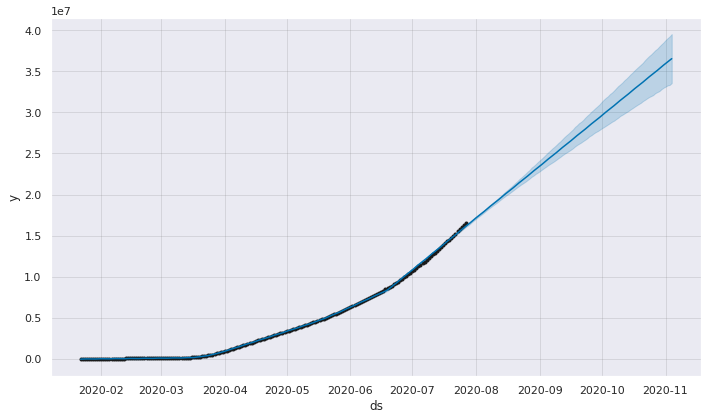

In [33]:
# plot the model
model.plot(prediction)
plt.show()

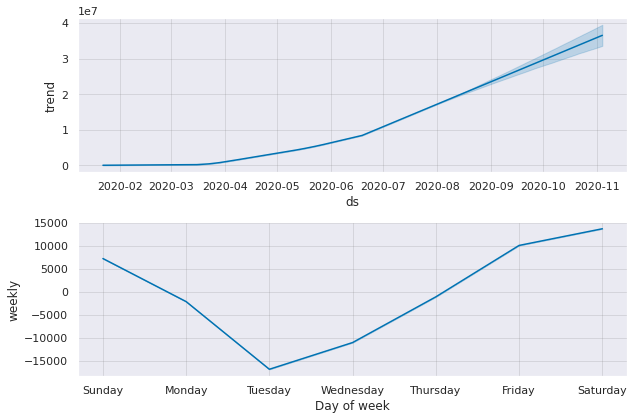

In [34]:
model.plot_components(prediction)
plt.show()

In [35]:
from prophet.plot import add_changepoints_to_plot

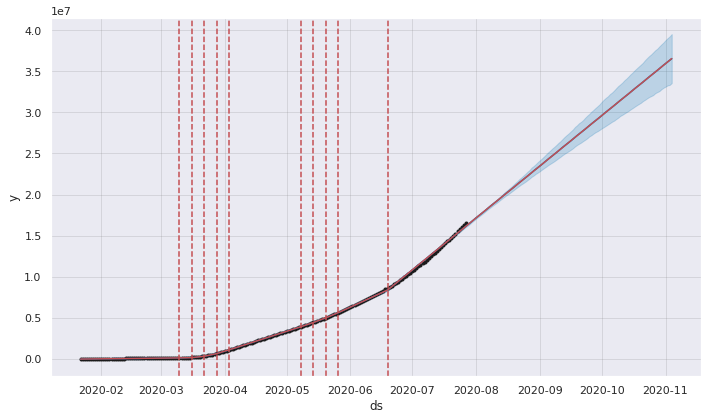

In [36]:
fig = model.plot(prediction)
a = add_changepoints_to_plot(fig.gca(),model,prediction)
plt.show()

In [37]:
from prophet.diagnostics import cross_validation

In [38]:
df_cv = cross_validation(model, horizon='30 days', period='15 days', initial='90 days')

INFO:prophet:Making 5 forecasts with cutoffs between 2020-04-28 00:00:00 and 2020-06-27 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpzzoeljkd/6y1y_5eb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzzoeljkd/92557gql.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51028', 'data', 'file=/tmp/tmpzzoeljkd/6y1y_5eb.json', 'init=/tmp/tmpzzoeljkd/92557gql.json', 'output', 'file=/tmp/tmpzzoeljkd/prophet_modeltrrnhhri/prophet_model-20230328034202.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
03:42:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:42:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzzoeljkd/vylr_zgu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzzoeljkd/boqiz4_w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [39]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-04-29,3.201065e+06,3.196085e+06,3.206216e+06,3185195,2020-04-28
1,2020-04-30,3.285434e+06,3.279178e+06,3.291684e+06,3268876,2020-04-28
2,2020-05-01,3.369641e+06,3.361959e+06,3.377505e+06,3355922,2020-04-28
3,2020-05-02,3.450903e+06,3.439835e+06,3.463278e+06,3437608,2020-04-28
4,2020-05-03,3.530367e+06,3.511648e+06,3.547921e+06,3515244,2020-04-28
...,...,...,...,...,...,...
145,2020-07-23,1.315232e+07,1.288726e+07,1.344101e+07,15510481,2020-06-27
146,2020-07-24,1.329181e+07,1.301358e+07,1.361258e+07,15791645,2020-06-27
147,2020-07-25,1.342814e+07,1.312631e+07,1.375342e+07,16047190,2020-06-27
148,2020-07-26,1.354685e+07,1.323030e+07,1.389180e+07,16251796,2020-06-27


In [41]:
from prophet.diagnostics import performance_metrics

In [42]:
df_performance = performance_metrics(df_cv)

In [43]:
df_performance

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,2.718205e+10,1.648698e+05,1.291484e+05,0.016867,0.017636,0.017049,0.000000
1,4 days,3.766143e+10,1.940655e+05,1.513276e+05,0.019327,0.022444,0.019572,0.000000
2,5 days,5.164722e+10,2.272602e+05,1.751485e+05,0.021776,0.025754,0.022095,0.066667
3,6 days,6.930725e+10,2.632627e+05,2.021212e+05,0.024553,0.026749,0.024964,0.133333
4,7 days,9.004918e+10,3.000820e+05,2.324638e+05,0.027835,0.031307,0.028360,0.200000
5,8 days,1.144819e+11,3.383517e+05,2.643133e+05,0.031145,0.034972,0.031803,0.200000
6,9 days,1.400582e+11,3.742435e+05,2.956176e+05,0.034331,0.038865,0.035134,0.200000
7,10 days,1.687604e+11,4.108046e+05,3.263360e+05,0.037373,0.043977,0.038325,0.200000
8,11 days,2.012295e+11,4.485862e+05,3.573228e+05,0.040366,0.048896,0.041469,0.200000
9,12 days,2.437795e+11,4.937403e+05,3.926095e+05,0.043543,0.052141,0.044826,0.200000


In [45]:
from prophet.plot import plot_cross_validation_metric

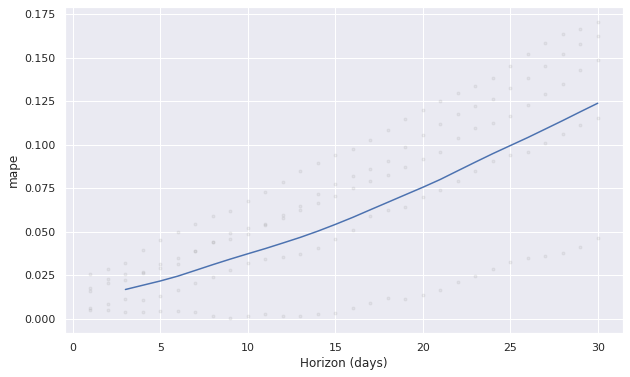

In [46]:
df_performance = plot_cross_validation_metric(df_cv, metric='mape')